## AIRBNB DATA ANALYSIS - Exploratory Data Analysis

In [6]:
import pandas as pd
import numpy as np
import plotly_express as px
from collections import Counter
import matplotlib.pyplot as plt
import collections
import plotly.graph_objects as go
import seaborn as sns

In [3]:
airbnb = pd.read_csv("Airbnb.csv")

Countries with high Airbnb

In [7]:
country_cnt=Counter(airbnb['Country'])
pd.DataFrame(country_cnt,index=np.arange(1)).sort_values(by=[0],axis=1,ascending=False)

,United States,Turkey,Canada,Spain,Australia,Brazil,Hong Kong,Portugal,China
0,1222,661,649,633,610,606,600,555,19


Text(0.5, 1.0, 'Top 5  Countries in Airbnb Property')

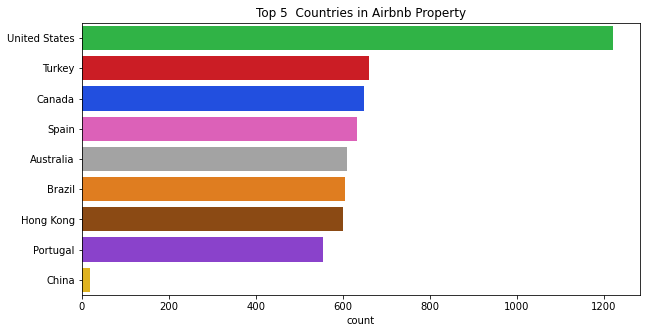

In [51]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=airbnb,y=airbnb.Country.values,order=airbnb.Country.value_counts().index[:],
                   palette="bright",hue=airbnb.Country.values, legend= False)
ax.set_title("Top 5  Countries in Airbnb Property")

Number of Room and Its Types

In [61]:
room=airbnb.Room_type
r=Counter(room)

roomdf=pd.DataFrame.from_dict(r,orient='index').sort_values(by=0)
roomdf.columns=['room_type']
roomdf.reset_index()

,index,room_type
0,Shared room,83
1,Private room,1983
2,Entire home/apt,3489


In [52]:
Roomdf=airbnb.groupby('Room_type').Id.count()
Roomdf=Roomdf.reset_index()
Roomdf=Roomdf.rename(columns={'Id':'Total_listed'})
label=Roomdf['Room_type']
values=Roomdf['Total_listed']
fig=go.Figure(data=[go.Pie(labels=label,values=values,hole=.5,title="Room Type Distribution")])
fig.update_layout(width=500,height=450)
fig.show()

<Figure size 720x360 with 0 Axes>

Heat Map For countries and it Room type

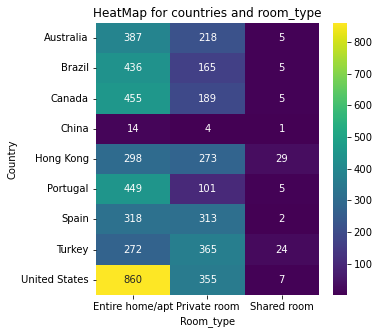

In [59]:
heatdf=pd.crosstab(airbnb['Country'],airbnb['Room_type'])
plt.figure(figsize=(5,5))
sns.heatmap(heatdf,cmap="viridis",annot=True,fmt="d")
plt.title("HeatMap for countries and room_type")
plt.show()

Property and it's average price

In [62]:
price_Df=airbnb.groupby(['Country','Property_type','Room_type']).price.mean()
price_Df=price_Df.reset_index()
price_Df=price_Df.sort_values('price',ascending=False)
price_Df.head()

,Country,Property_type,Room_type,price
106,Hong Kong,Condominium,Shared room,6841.5
172,Spain,Casa particular (Cuba),Entire home/apt,3000.0
114,Hong Kong,Heritage hotel (India),Private room,2999.0
121,Hong Kong,Houseboat,Entire home/apt,2999.0
108,Hong Kong,Farm stay,Private room,2496.0


In [70]:
fig = px.sunburst(price_Df,
                 path=['Room_type'],
                 values='price',
                 title='Sunburtst Chart for Room Type and  Price')
fig.update_layout(width =500, height = 500)

fig.show()

In [71]:
fig=px.bar(price_Df,x='price',y='Country',title='Average Price distribution in Room type and Corresponding Countries',
           color='Room_type')
fig.show()

In [77]:
fig=px.bar(price_Df,x='Property_type',y='price',title='Average Price distribution in Property type and Corresponding Countries',
           color='Country')
fig.show()

In [82]:
re_100=airbnb[['Country','Room_type','number_of_reviews']]
review_100=re_100.sort_values('number_of_reviews',ascending=False)
review_100=review_100[review_100['number_of_reviews']>=100].sort_values('number_of_reviews',ascending=False)
fig=px.scatter(review_100,x='number_of_reviews',y='Country',size='number_of_reviews',title="Countries has high No of review")
fig.update_layout(width =500, height = 500)
fig.show()

In [84]:
fig = px.scatter_mapbox(airbnb, lat='lati', lon='longi', color='price', size='accommodates',
                        hover_name='Name', mapbox_style="carto-positron", zoom=10)
fig.update_layout(title='Geospatial Distribution of Listings')
fig.show()

In [85]:
re_100=airbnb[['host_name','number_of_reviews','Country']]
review_100=re_100.sort_values('number_of_reviews',ascending=False)
review_100=review_100[review_100['number_of_reviews']>=250].sort_values('number_of_reviews',ascending=False)
fig=px.bar(review_100,x='number_of_reviews',y='host_name',color='Country',title="Host has high no review and Country")
fig.show()

In [86]:
re_100=airbnb[['host_name','number_of_reviews']]
review_100=re_100.sort_values('number_of_reviews',ascending=False)
review_100=review_100[review_100['number_of_reviews']>=100].sort_values('number_of_reviews',ascending=False)
fig=px.scatter(review_100,x='number_of_reviews',y='host_name',size='number_of_reviews',title="Host has high review")
fig.show()

In [87]:
cal_df=airbnb.groupby('cancellation_policy').Id.count()
cal_df=cal_df.reset_index()
cal_df=cal_df.rename(columns={'Id':'Total_listed'})
label=cal_df['cancellation_policy']
values=cal_df['Total_listed']
fig=go.Figure(data=[go.Pie(labels=label,values=values,hole=.5,title="cancellation_policy Distribution")])
fig.update_layout(width=500,height=450)
fig.show()